# Healthcare Patient Analysis & Outcome Prediction

Analyze patient hospitalization data to uncover trends in treatment outcomes, perform statistical tests, and build a dashboard that provides actionable insights for hospital management.

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
#loading Data
data=pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv')
data

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101583,Finger Lakes,Steuben,5001000.0,866.0,Corning Hospital,18 to 29,OOS,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,N,"6,296.75","4,197.53"
2101584,Hudson Valley,Westchester,5902001.0,1045.0,White Plains Hospital Center,50 to 69,125,M,Multi-racial,Unknown,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"122,882.04","37,761.67"
2101585,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,109,M,White,Not Span/Hispanic,...,Moderate,Minor,Surgical,Private Health Insurance,NaN,NaN,NaN,N,"291,358.19","117,144.76"
2101586,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,50 to 69,112,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"27,830.75","18,969.13"


## Exploratory Data Analysis (EDA)

In [3]:
# Information of Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [4]:
# Displaying Null values in percentage
(data.isna().sum()/data.shape[0])*100

Hospital Service Area                   0.506379
Hospital County                         0.506379
Operating Certificate Number            0.575327
Permanent Facility Id                   0.506379
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     2.144188
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
Discharge Year                          0.000000
CCSR Diagnosis Code                     0.077751
CCSR Diagnosis Description              0.077751
CCSR Procedure Code                    27.408845
CCSR Procedure Description             27.408845
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code        

In [5]:
data.shape

(2101588, 33)

In [6]:
#Diplaying first 15 Rows
data.iloc[:,:15].head(2)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,Emergency,Home w/ Home Health Services,2021,INF012
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,NVS005


In [7]:
#Displaying remaining Rows
data.iloc[:,16:].head(2)

,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,OTR004,ISOLATION PROCEDURES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,NaN,NaN,43,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"


In [8]:
#columns
data.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

**`Splitting Dataset based on diffrent criteria`**

In [9]:
# Hospital Information
data.iloc[:,:5].head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...


In [10]:
#Patient Demographics
data.iloc[:,5:10].head()

,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity
0,70 or Older,104,M,Other Race,Spanish/Hispanic
1,50 to 69,104,F,White,Not Span/Hispanic
2,18 to 29,104,F,Other Race,Spanish/Hispanic
3,70 or Older,104,M,Other Race,Spanish/Hispanic
4,50 to 69,104,F,Black/African American,Not Span/Hispanic


In [11]:
# Admission & Discharge Info
data.iloc[:,10:14].head()

,Length of Stay,Type of Admission,Patient Disposition,Discharge Year
0,27,Emergency,Home w/ Home Health Services,2021
1,4,Emergency,Home or Self Care,2021
2,2,Emergency,Home or Self Care,2021
3,5,Emergency,Home or Self Care,2021
4,3,Emergency,Home or Self Care,2021


In [12]:
# Diagnosis & Procedure Codes (CCSR)
data.iloc[:,14:18].head()

,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description
0,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),OTR004,ISOLATION PROCEDURES
1,NVS005,MULTIPLE SCLEROSIS,NaN,NaN
2,PRG016,PREVIOUS C-SECTION,PGN003,CESAREAN SECTION
3,GEN004,URINARY TRACT INFECTIONS,ADM017,ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC...
4,NVS008,PARALYSIS (OTHER THAN CEREBRAL PALSY),CNS002,LUMBAR PUNCTURE


In [13]:
# APR DRG & Severity Info
data.iloc[:,18:26].head()

,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description
0,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical
1,43,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical
2,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical
3,463,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical
4,58,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical


In [14]:
# Financial & Cost-Related Info
data.iloc[:,26:]

,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"
...,...,...,...,...,...,...,...
2101583,Private Health Insurance,NaN,NaN,NaN,N,"6,296.75","4,197.53"
2101584,Medicaid,NaN,NaN,NaN,Y,"122,882.04","37,761.67"
2101585,Private Health Insurance,NaN,NaN,NaN,N,"291,358.19","117,144.76"
2101586,Medicaid,NaN,NaN,NaN,Y,"27,830.75","18,969.13"


### Data Cleaning/Missing Values Analysis

In [15]:
# correcting the datatype errors of each column

data['Zip Code - 3 digits'] = pd.to_numeric(data['Zip Code - 3 digits'], errors='coerce')
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')
data['Discharge Year'] = pd.to_datetime(data['Discharge Year'], format='%Y')

# pandas can't convert those strings directly to numbers unless the commas are removed 
data['Total Charges'] = data['Total Charges'].str.replace(',', '')
data['Total Charges']= pd.to_numeric(data['Total Charges'], errors='coerce')

data['Total Costs'] = data['Total Costs'].str.replace(',', '')
data['Total Costs']= pd.to_numeric(data['Total Costs'], errors='coerce')

In [16]:
data.shape

(2101588, 33)

In [17]:
#Removing null values

# Droping columns which have nulls more then 30%
data.drop(columns=['Payment Typology 2','Payment Typology 3','Birth Weight'],inplace=True)

#Dropping rows
data.dropna(inplace=True)

In [18]:
data.isna().sum()

Hospital Service Area                  0
Hospital County                        0
Operating Certificate Number           0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Code                    0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

In [19]:
data.shape

(1441553, 30)

In [20]:
data.describe(include='all').iloc[:,10:30]

,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
count,1.441553e+06,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1.441553e+06,1441553,1.441553e+06,1441553,1.441553e+06,1441553,1441553,1441553,1441553,1441553,1.441553e+06,1.441553e+06
unique,NaN,6,19,NaN,467,467,318,318,NaN,324,NaN,24,NaN,4,4,2,9,2,NaN,NaN
top,NaN,Emergency,Home or Self Care,NaN,PNL001,LIVEBORN,PGN002,SPONTANEOUS VAGINAL DELIVERY,NaN,VAGINAL DELIVERY,NaN,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",NaN,Moderate,Minor,Medical,Medicare,Y,NaN,NaN
freq,NaN,876541,935262,NaN,131295,131295,108942,108942,NaN,119598,NaN,197743,NaN,487821,739545,985128,542722,825274,NaN,NaN
mean,6.142435e+00,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,4.130707e+02,NaN,1.030475e+01,NaN,2.179109e+00,NaN,NaN,NaN,NaN,NaN,8.471616e+04,2.523105e+04
min,1.000000e+00,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,3.180000e+00,2.900000e-01
25%,2.000000e+00,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,1.940000e+02,NaN,5.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,2.359860e+04,7.560700e+03
50%,3.000000e+00,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,3.850000e+02,NaN,9.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,4.607944e+04,1.392386e+04
75%,7.000000e+00,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,6.400000e+02,NaN,1.500000e+01,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,9.240650e+04,2.738479e+04
max,1.190000e+02,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,9.520000e+02,NaN,2.500000e+01,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,1.090562e+07,3.717779e+06


### Univariate Analysis

In [21]:
cat_col=['Hospital Service Area', 'Hospital County','Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission',
       'Patient Disposition',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator']

Hospital Service Area
New York City      705999
Long Island        236487
Hudson Valley      134979
Central NY         105537
Western NY          89498
Finger Lakes        80505
Capital/Adirond     71383
Southern Tier       17165
Name: count, dtype: int64


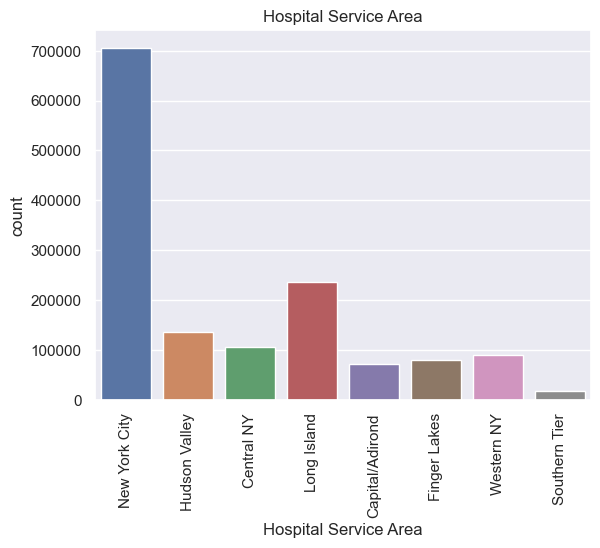

Hospital County
Manhattan      278785
Kings          143598
Nassau         132280
Queens         126801
Bronx          123469
Suffolk        104207
Westchester     74538
Erie            72987
Monroe          63978
Onondaga        60858
Richmond        33346
Albany          29754
Dutchess        20293
Orange          19433
Broome          16362
Oneida          14430
Rockland        14381
Schenectady      9140
St Lawrence      8104
Otsego           6488
Saratoga         6306
Jefferson        6198
Warren           6147
Ontario          5981
Niagara          5200
Clinton          5147
Chemung          4225
Madison          4034
Chautauqua       3982
Tompkins         3907
Cayuga           3410
Cattaraugus      3161
Ulster           2556
Steuben          2377
Wayne            2267
Genesee          2174
Montgomery       2124
Oswego           1994
Sullivan         1945
Putnam           1833
Franklin         1796
Columbia         1785
Livingston       1595
Fulton           1586
Cortland        

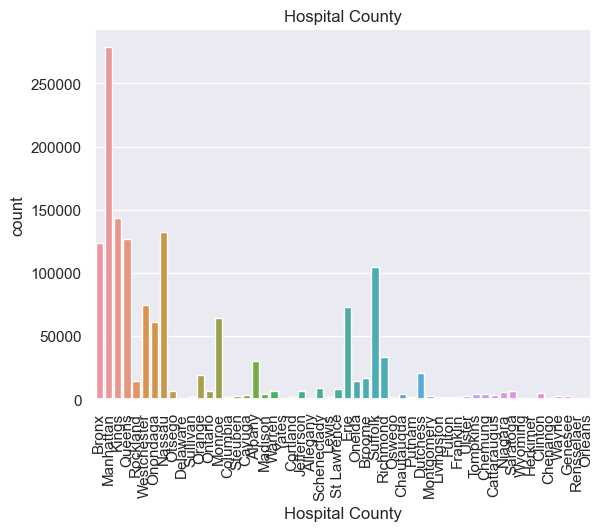

Age Group
50 to 69       406204
70 or Older    402636
30 to 49       305820
0 to 17        186379
18 to 29       140514
Name: count, dtype: int64


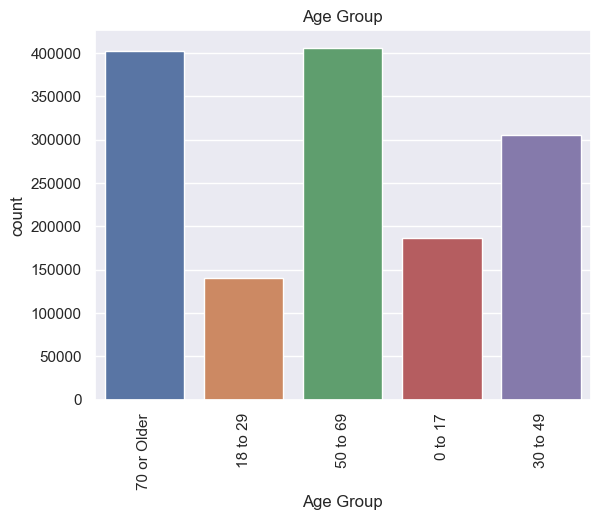

Zip Code - 3 digits
112.0    201837
104.0    156896
117.0    127067
100.0    119565
113.0     83644
115.0     63128
114.0     61459
105.0     39583
103.0     39453
142.0     37836
109.0     33416
146.0     32369
130.0     28138
125.0     26505
140.0     25070
119.0     21402
132.0     20855
136.0     18664
110.0     18368
107.0     18346
145.0     18252
144.0     16760
111.0     15776
120.0     15635
134.0     12821
131.0     12318
128.0     12284
148.0     12059
141.0     11553
121.0     10636
116.0     10455
124.0     10140
133.0      9350
147.0      9320
137.0      8769
123.0      8736
138.0      8038
129.0      7459
127.0      6726
122.0      6276
126.0      6049
135.0      5793
108.0      5655
118.0      5591
139.0      5573
106.0      4996
143.0      4899
101.0      3714
149.0      2319
Name: count, dtype: int64


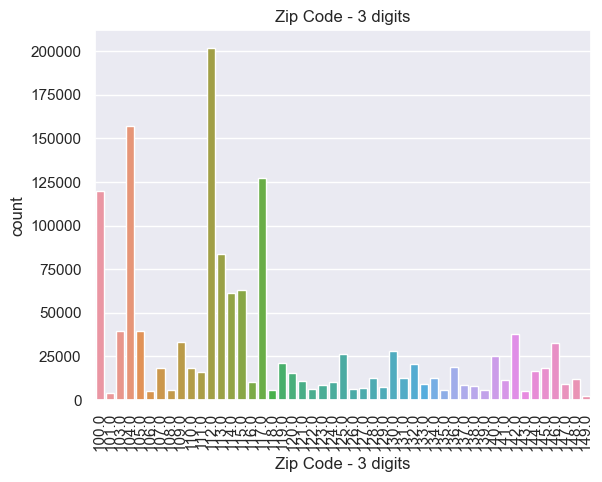

Gender
F    789606
M    651928
U        19
Name: count, dtype: int64


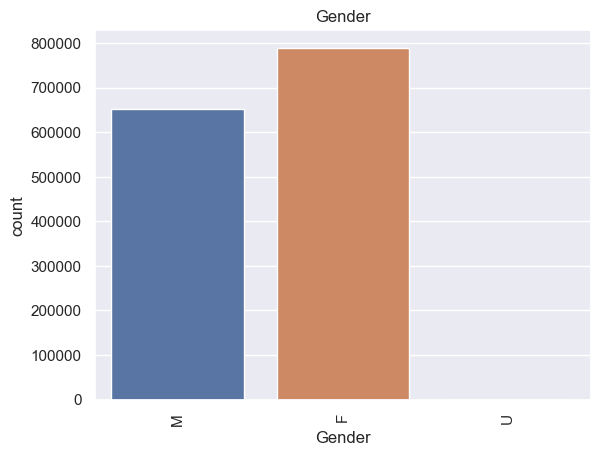

Race
White                     752849
Other Race                404987
Black/African American    269371
Multi-racial               14346
Name: count, dtype: int64


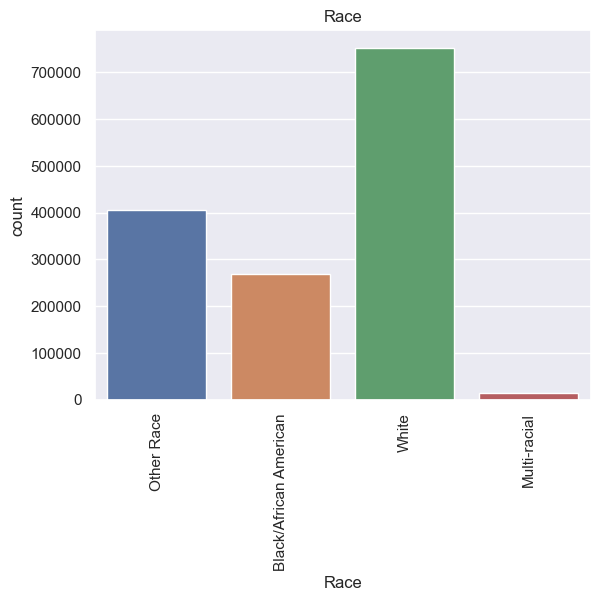

Ethnicity
Not Span/Hispanic    1064273
Spanish/Hispanic      237535
Unknown               136882
Multi-ethnic            2863
Name: count, dtype: int64


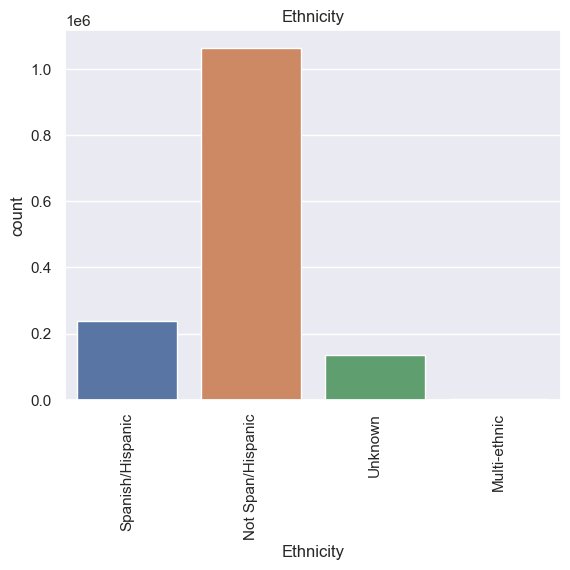

Type of Admission
Emergency        876541
Elective         302934
Newborn          130227
Urgent           125451
Trauma             5663
Not Available       737
Name: count, dtype: int64


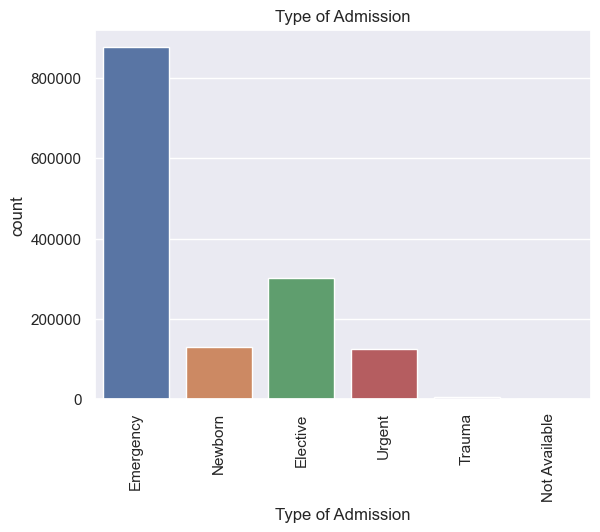

Patient Disposition
Home or Self Care                        935262
Home w/ Home Health Services             219857
Skilled Nursing Home                     122931
Expired                                   51770
Left Against Medical Advice               30995
Inpatient Rehabilitation Facility         25120
Short-term Hospital                       21088
Hospice - Home                             7674
Hospice - Medical Facility                 6072
Another Type Not Listed                    5007
Psychiatric Hospital or Unit of Hosp       4568
Facility w/ Custodial/Supportive Care      3003
Court/Law Enforcement                      2380
Medicare Cert Long Term Care Hospital      1954
Hosp Basd Medicare Approved Swing Bed      1459
Cancer Center or Children's Hospital       1376
Medicaid Cert Nursing Facility              601
Federal Health Care Facility                337
Critical Access Hospital                     99
Name: count, dtype: int64


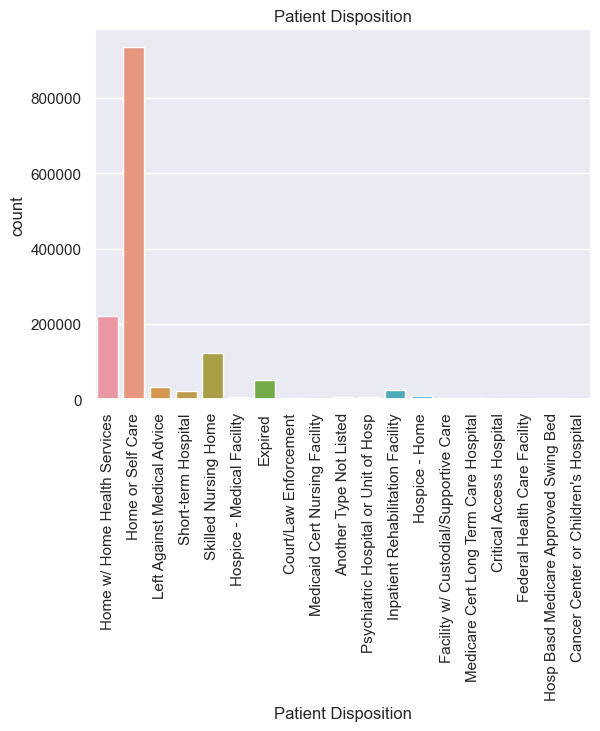

APR Severity of Illness Description
Moderate    487821
Minor       431638
Major       354355
Extreme     167739
Name: count, dtype: int64


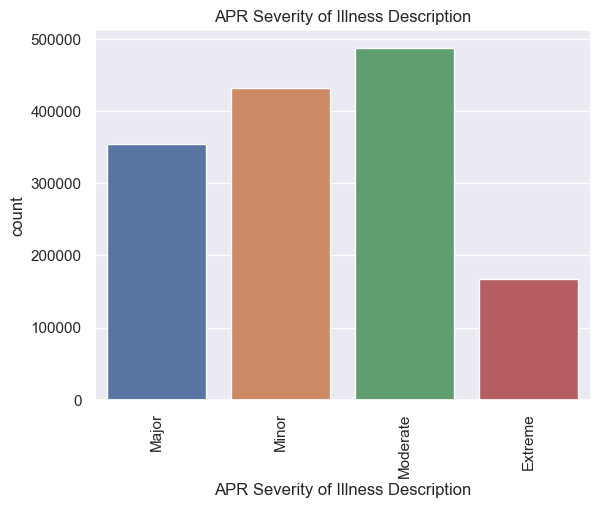

APR Risk of Mortality
Minor       739545
Moderate    269548
Major       268659
Extreme     163801
Name: count, dtype: int64


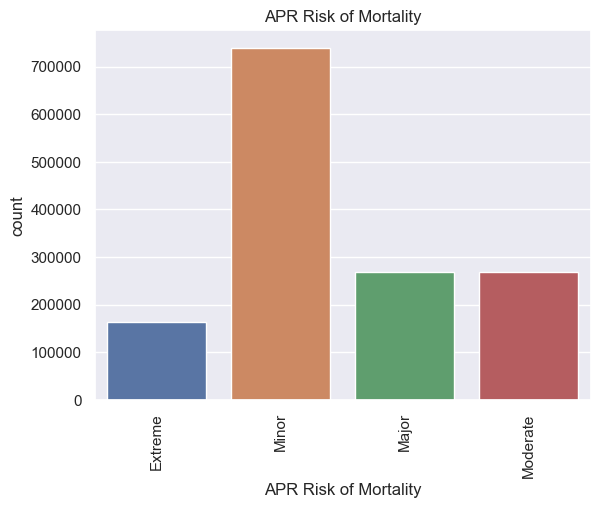

APR Medical Surgical Description
Medical     985128
Surgical    456425
Name: count, dtype: int64


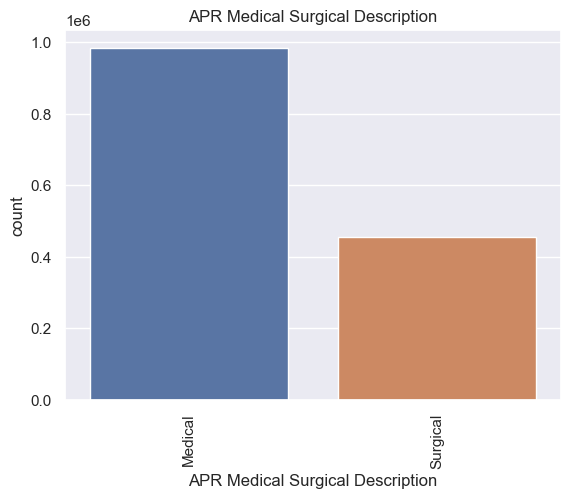

Payment Typology 1
Medicare                     542722
Medicaid                     460198
Private Health Insurance     218107
Blue Cross/Blue Shield       157040
Managed Care, Unspecified     18460
Self-Pay                      16486
Miscellaneous/Other           15745
Federal/State/Local/VA        12059
Department of Corrections       736
Name: count, dtype: int64


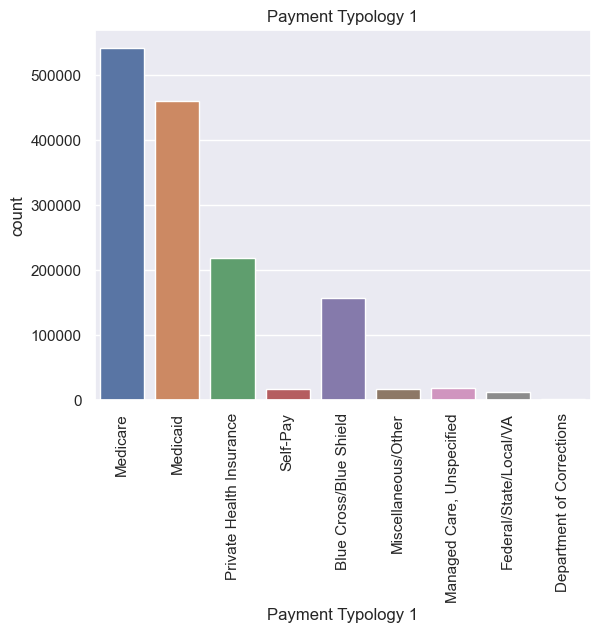

Emergency Department Indicator
Y    825274
N    616279
Name: count, dtype: int64


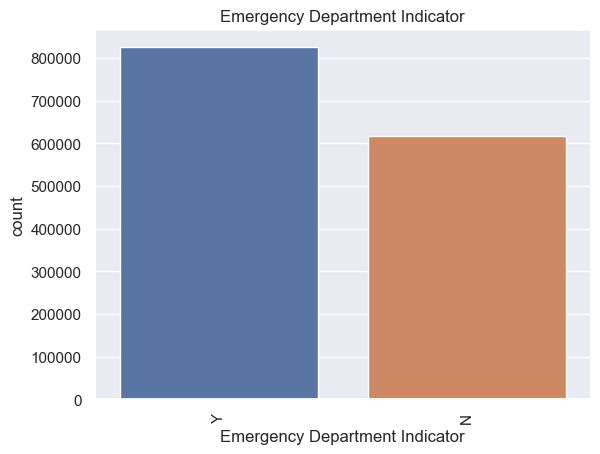

In [22]:
for i in cat_col:
    print(data[i].value_counts())
    sns.countplot(data=data,x=data[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

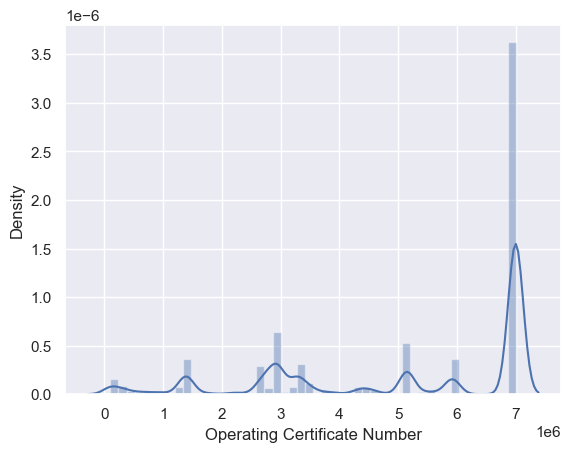

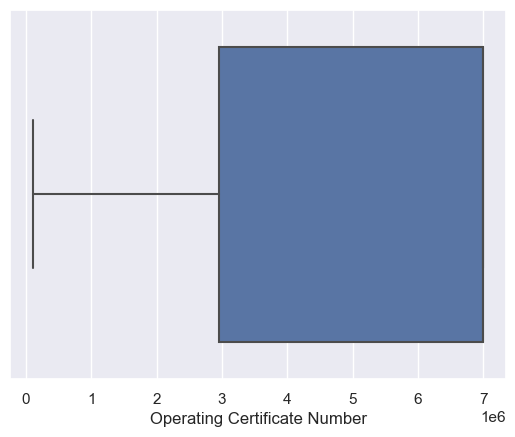

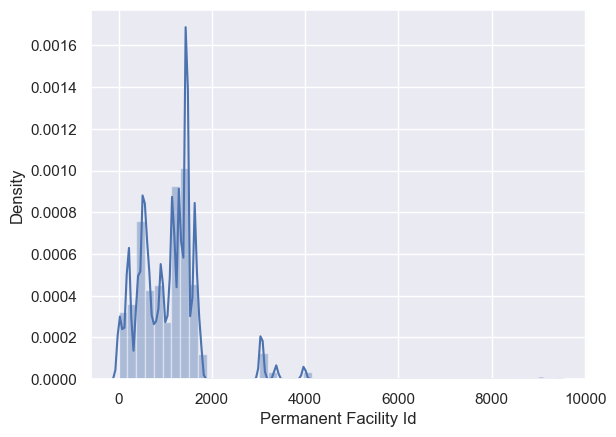

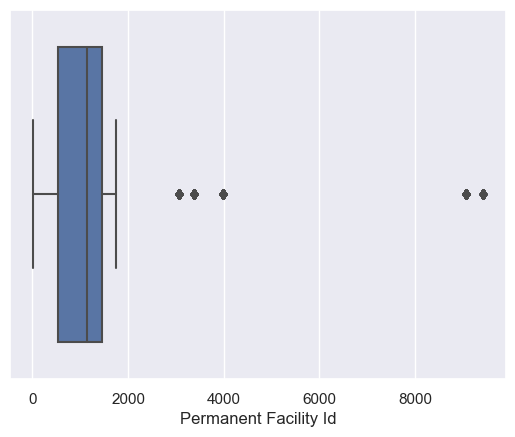

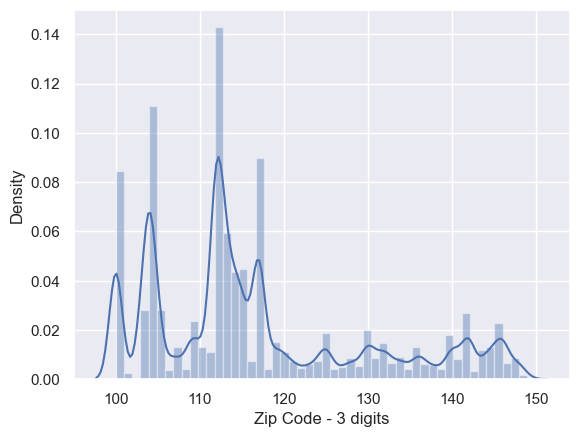

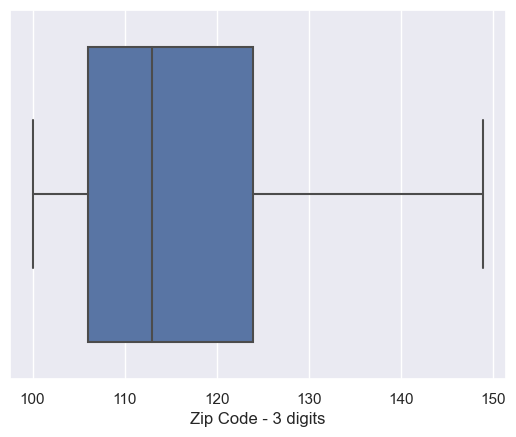

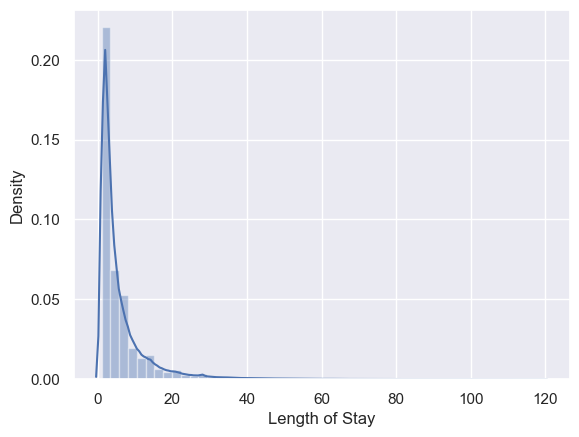

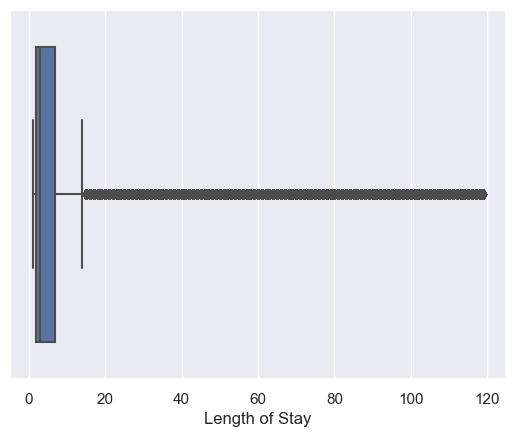

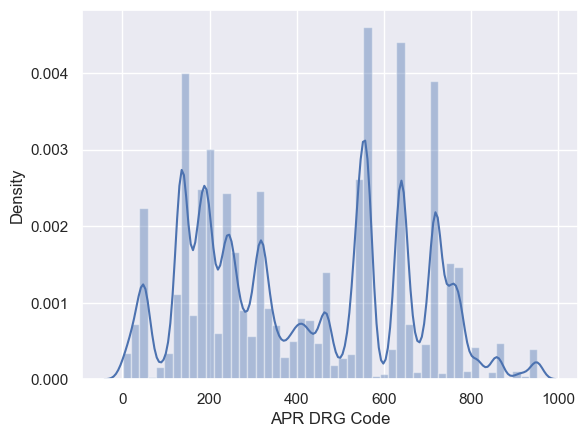

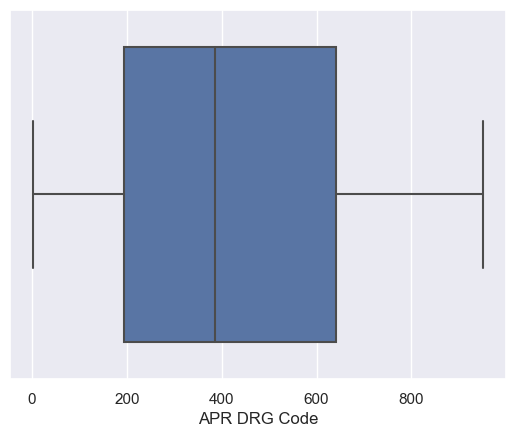

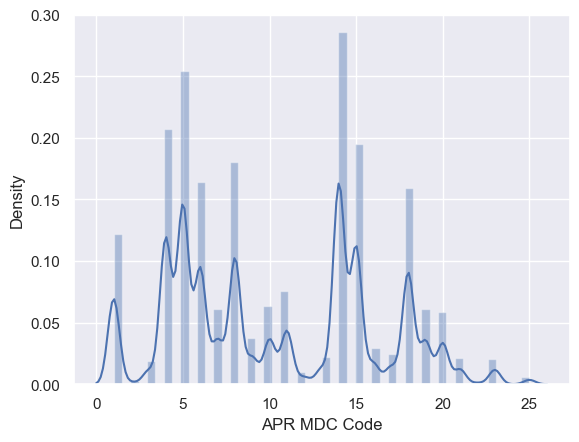

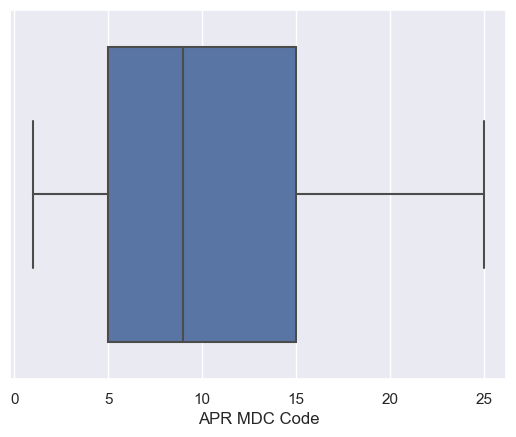

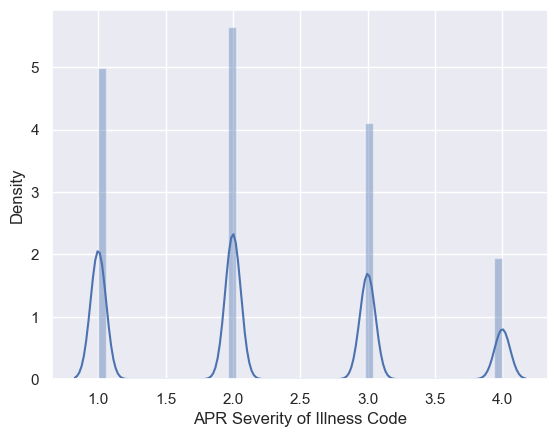

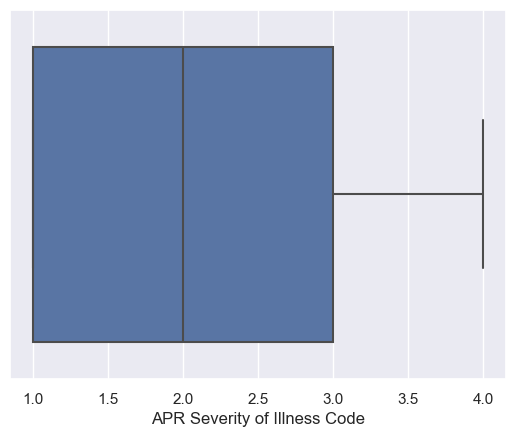

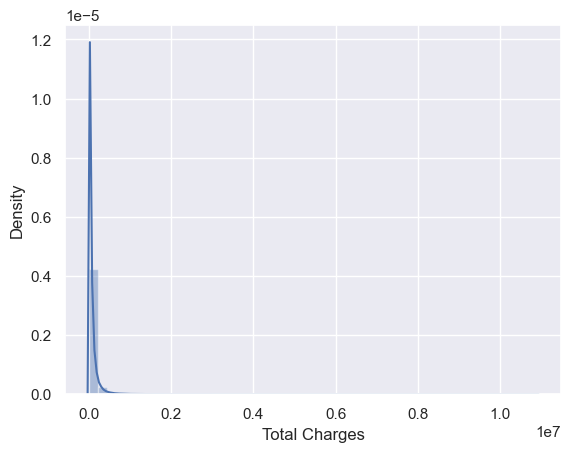

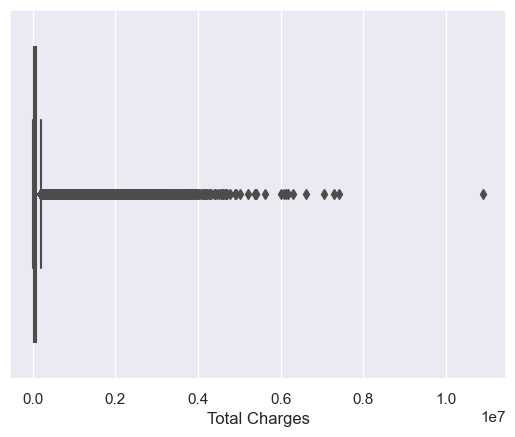

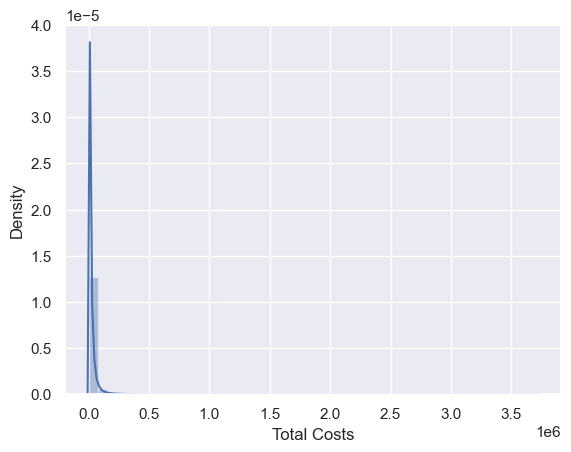

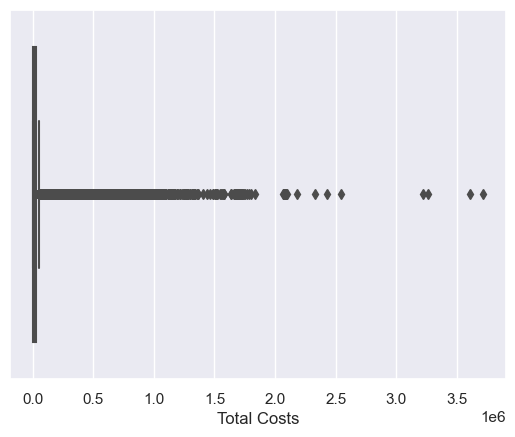

In [23]:
num_col=['Operating Certificate Number', 'Permanent Facility Id',
       'Zip Code - 3 digits', 'Length of Stay',
       'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code',
       'Total Charges', 'Total Costs']
for i in num_col:
    sns.distplot(data[i])
    plt.show()
    
    sns.boxplot(x=data[i])
    plt.show()

In [24]:
data.iloc[:,10:].head()

,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,27.0,Emergency,Home w/ Home Health Services,2021-01-01,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),OTR004,ISOLATION PROCEDURES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Y,320922.43,60241.34
2,2.0,Emergency,Home or Self Care,2021-01-01,PRG016,PREVIOUS C-SECTION,PGN003,CESAREAN SECTION,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,N,42705.34,11366.50
3,5.0,Emergency,Home or Self Care,2021-01-01,GEN004,URINARY TRACT INFECTIONS,ADM017,ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC...,463,KIDNEY AND URINARY TRACT INFECTIONS,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,Y,72700.17,12111.75
4,3.0,Emergency,Home or Self Care,2021-01-01,NVS008,PARALYSIS (OTHER THAN CEREBRAL PALSY),CNS002,LUMBAR PUNCTURE,58,OTHER DISORDERS OF NERVOUS SYSTEM,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,Y,55562.51,8339.72
5,6.0,Emergency,Home or Self Care,2021-01-01,INJ037,COMPLICATION OF OTHER SURGICAL OR MEDICAL CARE...,IMG007,COMPUTERIZED TOMOGRAPHY (CT) WITHOUT CONTRAST,813,OTHER COMPLICATIONS OF TREATMENT,21,"INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS",3,Major,Moderate,Medical,Private Health Insurance,Y,109269.27,18443.00


In [25]:
#Descriptive Satistics for Object Columns
data.describe(include='O')

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
count,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553,1441553
unique,8,54,192,5,3,4,4,6,19,467,467,318,318,324,24,4,4,2,9,2
top,New York City,Manhattan,Mount Sinai Hospital,50 to 69,F,White,Not Span/Hispanic,Emergency,Home or Self Care,PNL001,LIVEBORN,PGN002,SPONTANEOUS VAGINAL DELIVERY,VAGINAL DELIVERY,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",Moderate,Minor,Medical,Medicare,Y
freq,705999,278785,39582,406204,789606,752849,1064273,876541,935262,131295,131295,108942,108942,119598,197743,487821,739545,985128,542722,825274


In [31]:
len(sorted(data['Length of Stay'].unique()))

119

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)

### Bivariate Analysis

**`Relationship between Total Charges and Length of Stay`** 

This scatter plot with a regression line illustrates the relationship between the Average total hospital charges and the patient's length of stay. It helps in identifying whether longer hospital stays contribute to increased healthcare costs.

In [40]:
# Mean Total Charges for each Length of Stay (in days)
days_Charg=data.groupby(['Length of Stay'])['Total Charges'].agg('mean').reset_index()
days_Charg

,Length of Stay,Total Charges
0,1.00,39456.11
1,2.00,33858.65
2,3.00,45530.53
3,4.00,58483.08
4,5.00,70201.20
...,...,...
114,115.00,1413593.43
115,116.00,1609336.79
116,117.00,1498143.28
117,118.00,1387917.38


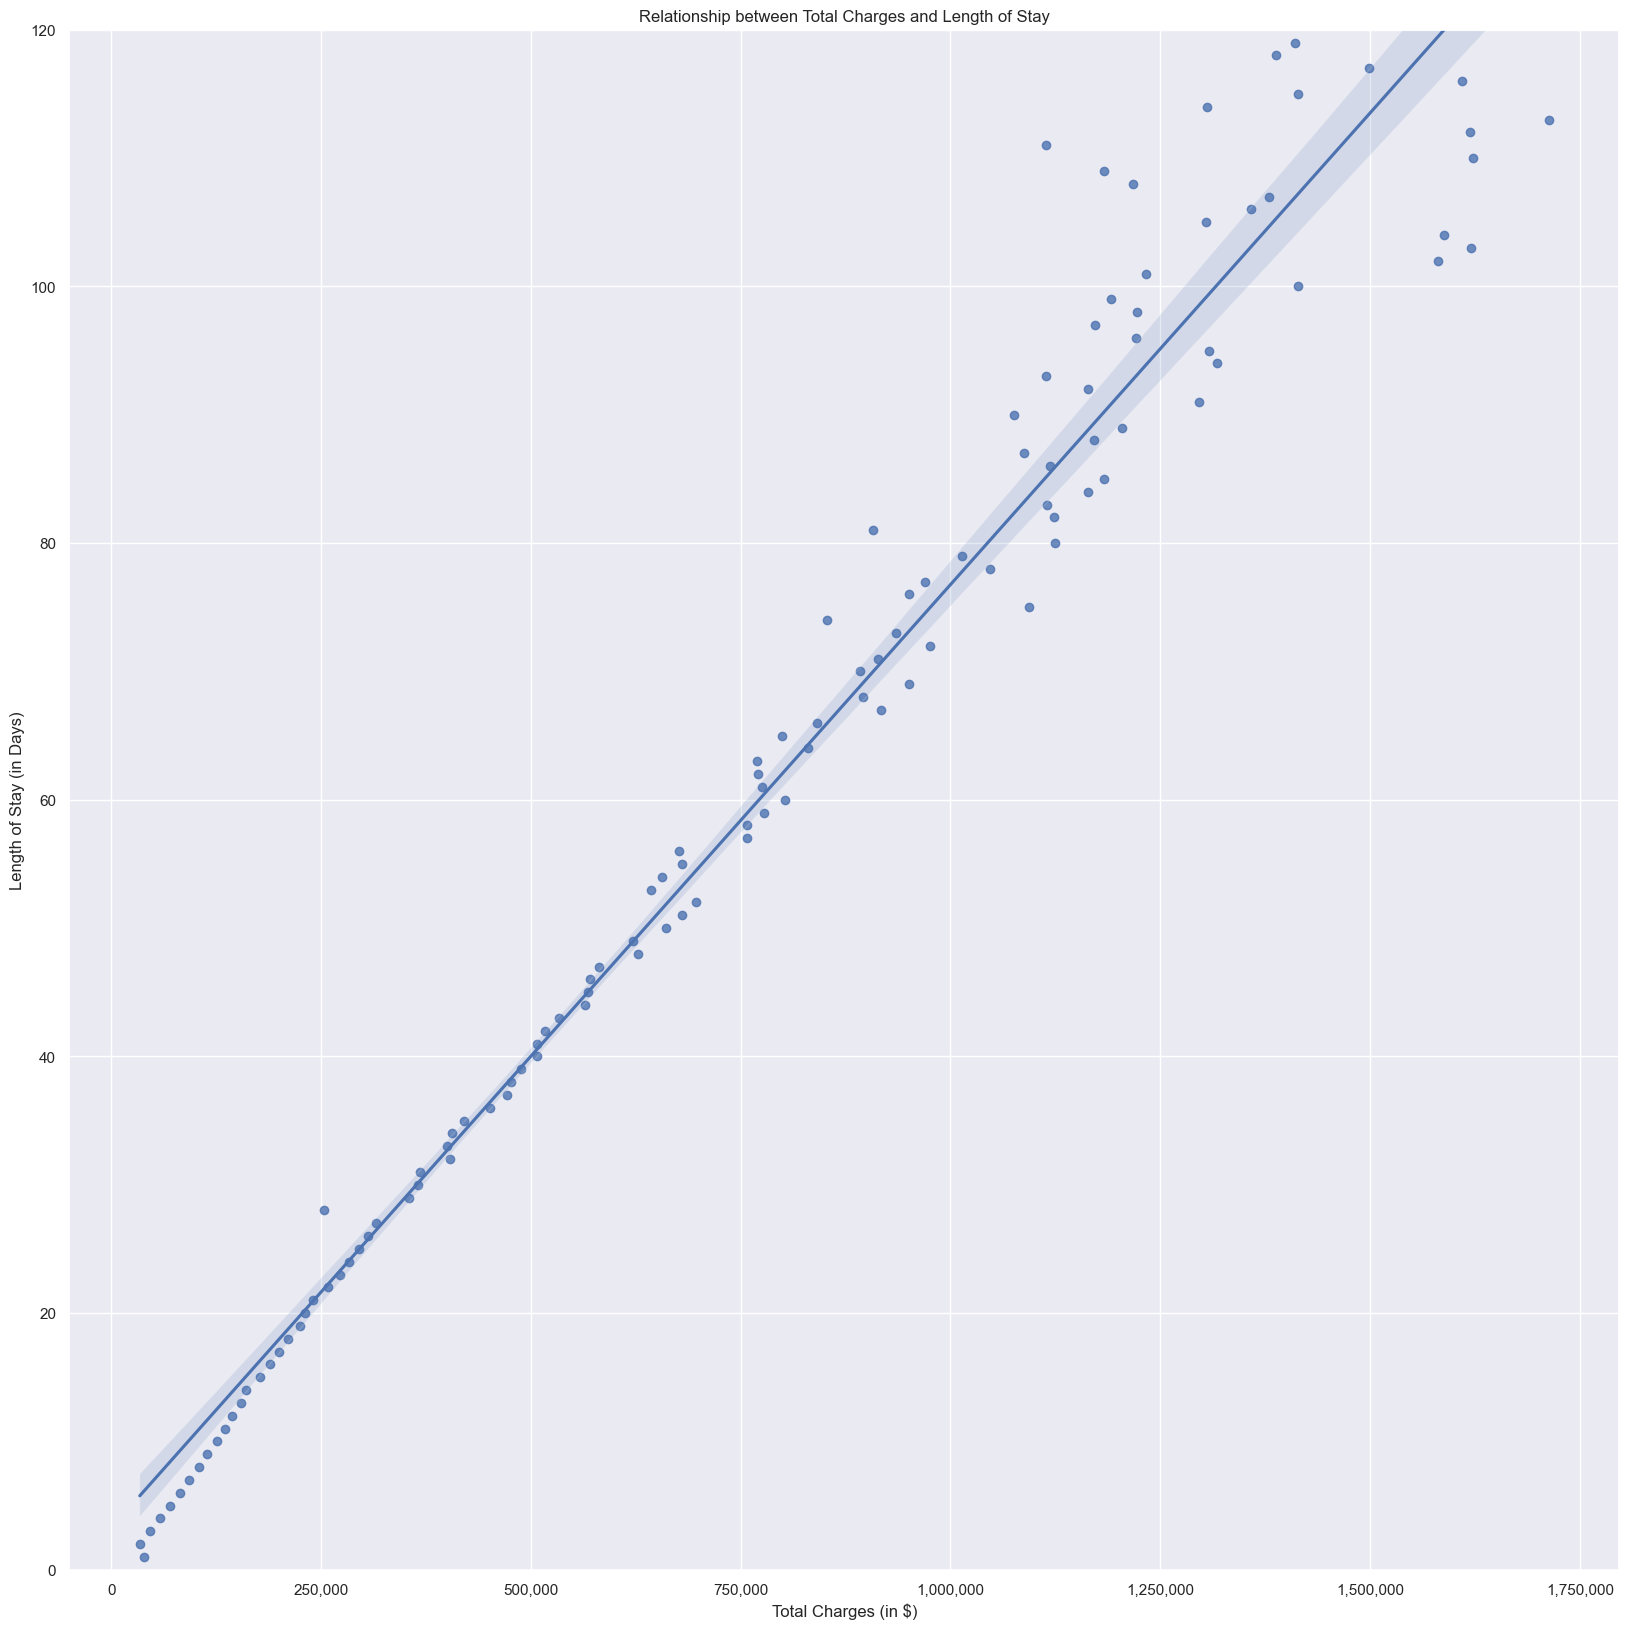

In [110]:
import matplotlib.ticker as ticker

plt.figure(figsize = (20,20))
sns.regplot(x='Total Charges',y='Length of Stay',data=days_Charg)
plt.ylim((0,120))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Total Charges (in $)')
plt.ylabel('Length of Stay (in Days)')
plt.title('Relationship between Total Charges and Length of Stay')
plt.grid(True)
plt.show()

**Strong Positive Correlation:**

- There is a clear linear relationship between Total Charges and Length of Stay.

- As the number of days increases, the charges also increase, almost proportionally.

- The regression line fits the data well, indicating a strong positive correlation (likely close to +1).

**Prediction Possibility:**

- Because the line is so well-fit, Length of Stay can be a strong predictor of Total Charges and vice versa.

- Could be modeled using linear regression in further predictive modeling.

**Outliers:**

- A few points at higher ends (Length of Stay > 90 or Charges > $1.5M) seem slightly scattered, but most values follow the trend line closely.

- You might want to explore whether those outliers are due to specific diagnoses, procedures, or patient profiles.

___________________________________________________________________________________________________.

In [49]:
data['APR Severity of Illness Description'].value_counts()

APR Severity of Illness Description
Moderate    487821
Minor       431638
Major       354355
Extreme     167739
Name: count, dtype: int64

**`Total Costs vs. Severity of Illness`**

This boxplot visualizes how hospital costs vary based on the severity of a patient's illness, using the APR Severity of Illness Description categories: Minor, Moderate, Major, and Extreme. It helps uncover trends and outliers in treatment expenses across different severity levels.

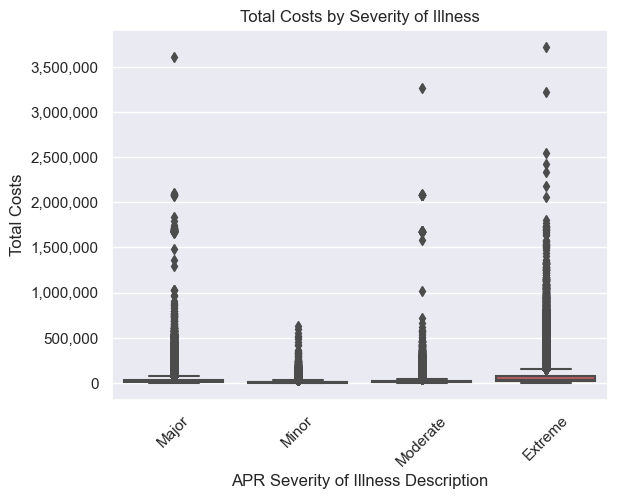

In [51]:
sns.boxplot(x='APR Severity of Illness Description', y='Total Costs', data=data)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Total Costs by Severity of Illness')
plt.xticks(rotation=45)
plt.show()

**Clear Upward Trend:**

- As severity increases from Minor to Extreme, median costs also increase significantly.

- This trend aligns with expectations: more severe conditions require intensive care and resources.

**Extreme Category Shows Highest Variability:**

- The Extreme category has the widest spread of total costs, indicating high variability in treatment approaches or complications.

- It also contains numerous outliers, including cases exceeding $3.5 million.

**Minor and Moderate Are More Consistent:**

- These categories have lower median costs and smaller interquartile ranges, showing more predictable healthcare expenses.

**Major vs. Moderate:**

- Surprisingly, some Major severity cases show similar or slightly lower medians than Moderate ones—worth deeper investigation (e.g., procedure types or hospital practices).

___________________________________________________________________________________________________.

**`Distribution of Mortality Risk by Severity of Illness`**

This stacked bar chart displays the proportional distribution of APR Risk of Mortality across different categories of APR Severity of Illness. It helps us understand how mortality risk levels vary with the severity of the patient's condition.

In [56]:
pd.crosstab(data['APR Severity of Illness Description'], data['APR Risk of Mortality'])

APR Risk of Mortality,Extreme,Major,Minor,Moderate
APR Severity of Illness Description,,,,
Extreme,130655,33475,854,2755
Major,32552,190476,43711,87616
Minor,13,1807,404902,24916
Moderate,581,42901,290078,154261


<Axes: xlabel='APR Severity of Illness Description'>

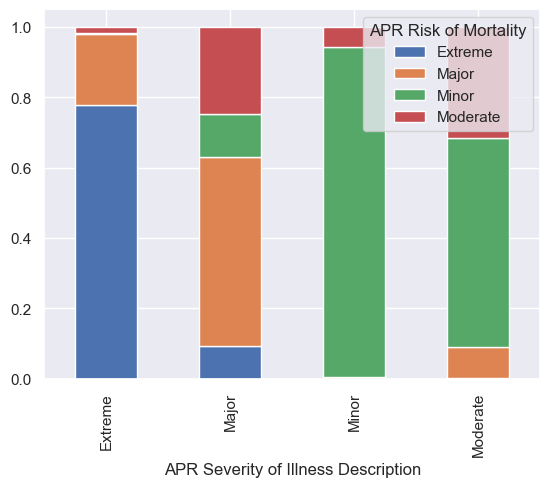

In [54]:
pd.crosstab(data['APR Severity of Illness Description'], data['APR Risk of Mortality'], normalize='index') \
  .plot(kind='bar', stacked=True)

- `Extreme Severity` of Illness is overwhelmingly associated with **Extreme Risk of Mortality** — indicating that patients classified with extreme illness are the most likely to be in critical condition.

- `Major Severity` shows a more mixed distribution, with a majority of patients falling under **Major and Moderate Risk** of Mortality.

- `Moderate Severity` is mostly linked to Minor Risk, with a small portion in Moderate and Major risk levels.

- `Minor Severity` is almost entirely associated with Minor Risk of Mortality, showing consistency between lower illness severity and **lower mortality risk.**

This chart confirms a positive correlation between the severity of illness and the risk of mortality—as severity increases, so does the mortality risk. This insight can support hospital triaging and resource prioritization.

___________________________________________________________________________________________________.

**`Distribution of Length of Stay by Gender`**

This violin plot visualizes the distribution of hospital stay durations across different gender categories (Male, Female, Unknown). It combines a box plot and KDE (kernel density estimate) to show data spread, central tendency, and density.

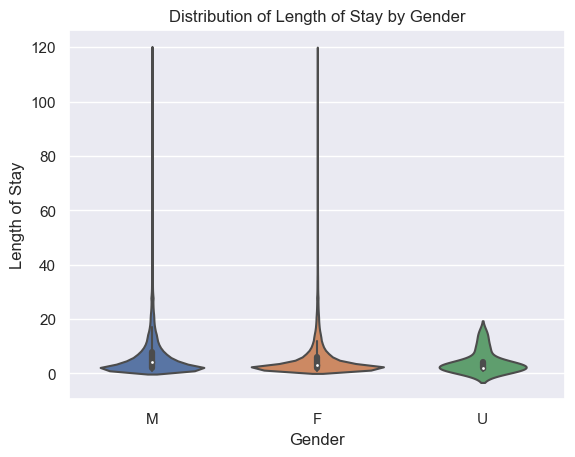

In [57]:
sns.violinplot(x='Gender', y='Length of Stay', data=data)
plt.title('Distribution of Length of Stay by Gender')
plt.show()

- Male (M) and Female (F) patients have similar distributions with most stays clustering around 2 to 5 days, but with longer tails, indicating a few patients had very extended stays.

- The Unknown (U) gender category shows a shorter and tighter distribution, with a peak around 3–5 days, and fewer extreme cases.

- Extreme outliers (long stays of over 100 days) are visible for both M and F, but not for U.

Overall, there doesn’t appear to be a strong gender-based difference in the central tendency of hospital stay duration, though variation and outliers are more prominent in known gender groups.

___________________________________________________________________________________________________.

**`Total Charges Across Admission Types`**

This boxplot illustrates the distribution of hospital total charges based on different types of admission, helping to identify patterns in billing associated with the urgency or nature of admission.

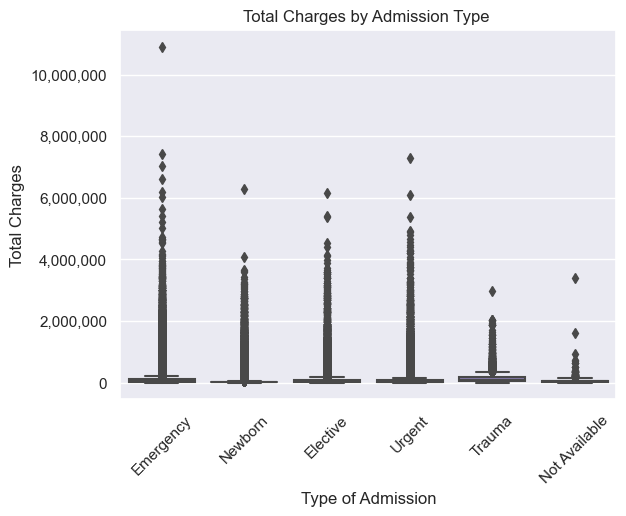

In [66]:
sns.boxplot(x='Type of Admission', y='Total Charges', data=data)
plt.title('Total Charges by Admission Type ')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.show()

Emergency, Urgent, and Elective admissions show relatively high median charges with a large number of outliers, especially in Emergency cases, where charges exceed 10 million in some instances.

Newborn and Trauma admissions tend to have lower median charges, but still exhibit some significant outliers.

'Not Available' entries have comparatively lower median charges and fewer extreme values, but they may reflect missing or incomplete data rather than actual trends.

Emergency admissions have the widest spread, indicating high variability in treatment costs, likely due to the unpredictable nature and severity of these cases.

___________________________________________________________________________________________________.

**`Length of Stay Distribution Across Age Groups`**

This boxplot visualizes the hospital length of stay for patients segmented by age groups, offering insights into how age may influence hospitalization duration.



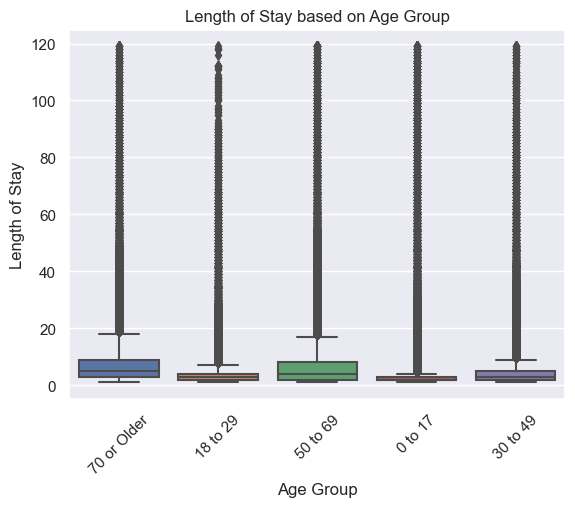

In [67]:
sns.boxplot(x='Age Group', y='Length of Stay', data=data)
plt.title('Length of Stay based on Age Group')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.show()

Patients aged 70 or older and those in the 50 to 69 age group show higher median lengths of stay, reflecting potentially more complex or chronic health conditions.

Younger age groups like 0 to 17 and 18 to 29 typically have shorter stays, but a few extreme outliers suggest isolated cases of prolonged treatment.

Overall, outliers are prevalent across all age categories, indicating that some patients, regardless of age, experience exceptionally long hospitalizations.

The spread in older age brackets is slightly broader, reinforcing the idea that age and health complexity are correlated with longer hospital stays.

___________________________________________________________________________________________________.

**`Total Hospital Charges Across Age Groups`**

This boxplot displays the distribution of total charges incurred for patients grouped by age categories, highlighting financial trends in healthcare services by age.



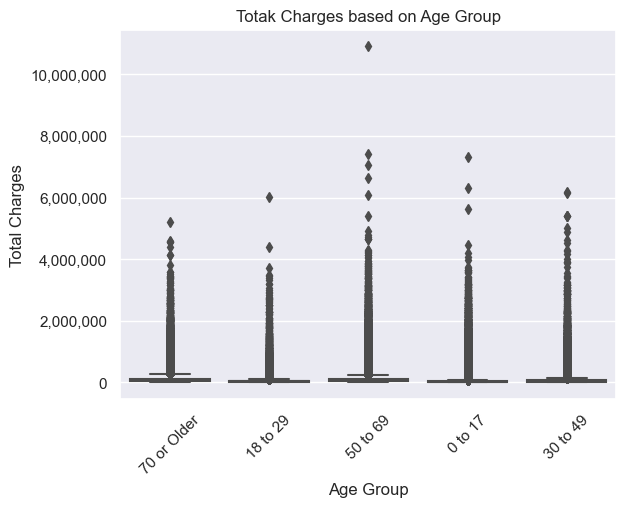

In [111]:
sns.boxplot(x='Age Group', y='Total Charges', data=data)
plt.title('Totak Charges based on Age Group')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.show()

Patients in the 50 to 69 age group show the widest spread and highest median total charges, indicating significant healthcare expenditures, possibly due to chronic conditions or complex treatments.

The 70 or older and 30 to 49 groups also show notable charges, though slightly more centralized compared to the 50–69 group.

Outliers are present in every group, with some cases exceeding 10 million, reflecting instances of extremely high-cost treatments.

Interestingly, even younger patients (0 to 17) show a few high-cost outliers, which may be due to intensive or emergency treatments like NICU or trauma care.

18 to 29 appears to have relatively lower total charges with fewer high-value outliers, potentially indicating fewer critical interventions in this group.
___________________________________________________________________________________________________.

**`Average Total Charges and Costs by Age Group`**

This bar chart compares the average total charges and average total costs across different age groups for hospital patients. The data is visualized using side-by-side bars:

- `Blue bars` represent the average `total charges` billed to patients.

- `Orange bars` represent the average `total costs` incurred by the hospitals.

In [79]:
age_TC=data.groupby(['Age Group'])[["Total Charges",'Total Costs']].agg('mean').reset_index()
age_TC

,Age Group,Total Charges,Total Costs
0,0 to 17,52858.13,14847.09
1,18 to 29,49454.80,16573.65
2,30 to 49,63638.11,20037.86
3,50 to 69,105312.09,31653.97
4,70 or Older,107000.13,30523.69


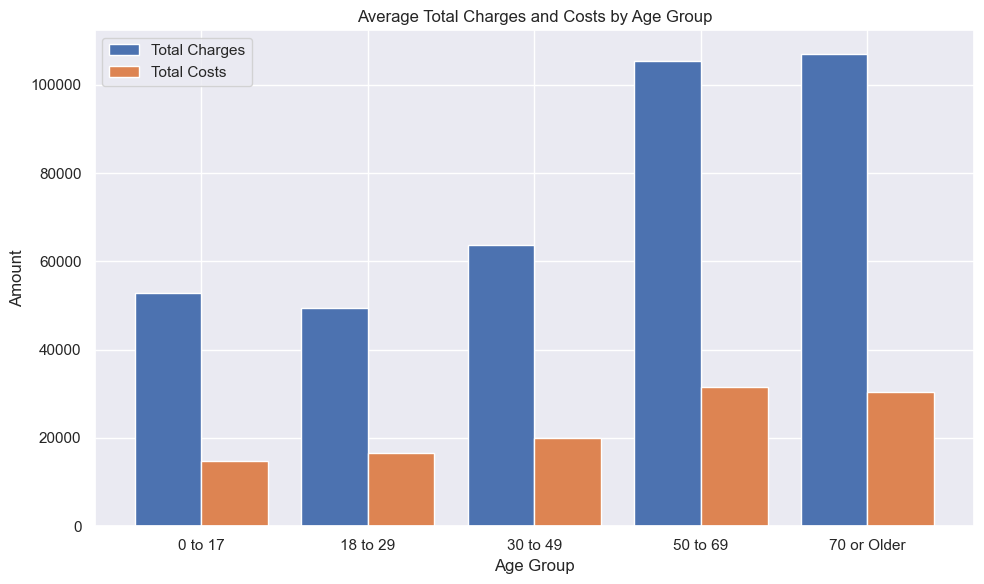

In [113]:
plt.figure(figsize=(10, 6))
bar_width = 0.4

x = range(len(age_TC))

# Total Charges
plt.bar([p - bar_width/2 for p in x], age_TC['Total Charges'], width=bar_width, label='Total Charges')

# Total Costs
plt.bar([p + bar_width/2 for p in x], age_TC['Total Costs'], width=bar_width, label='Total Costs')

plt.xticks(ticks=x, labels=age_TC['Age Group'])
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Average Total Charges and Costs by Age Group')
plt.legend()
plt.tight_layout()
plt.show()


Charges consistently exceed costs across all age groups, reflecting a common healthcare markup pattern.

The highest charges and costs are observed in the "50 to 69" and "70 or Older" groups, likely due to increased complexity and frequency of health conditions in older adults.

The "18 to 29" age group shows the lowest average charges, possibly due to lower healthcare utilization or simpler treatments.

Interestingly, the cost-to-charge gap is widest in older age groups, suggesting higher pricing margins or more specialized treatments.
___________________________________________________________________________________________________.

## Statistical Analysis

In [81]:
# Discriptive Statistics 
data.describe()

,Operating Certificate Number,Permanent Facility Id,Zip Code - 3 digits,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,1441553.00,1441553.00,1441553.00,1441553.00,1441553,1441553.00,1441553.00,1441553.00,1441553.00,1441553.00
mean,5146958.13,1067.48,116.96,6.14,2021-01-01 00:00:00,413.07,10.30,2.18,84716.16,25231.05
min,101000.00,1.00,100.00,1.00,2021-01-01 00:00:00,1.00,1.00,1.00,3.18,0.29
25%,2953000.00,541.00,106.00,2.00,2021-01-01 00:00:00,194.00,5.00,1.00,23598.60,7560.70
50%,7000001.00,1139.00,113.00,3.00,2021-01-01 00:00:00,385.00,9.00,2.00,46079.44,13923.86
75%,7002024.00,1456.00,124.00,7.00,2021-01-01 00:00:00,640.00,15.00,3.00,92406.50,27384.79
max,7004010.00,9431.00,149.00,119.00,2021-01-01 00:00:00,952.00,25.00,4.00,10905621.76,3717778.88
std,2199453.44,667.52,13.31,8.43,NaN,238.76,5.77,0.99,142314.87,44494.35


**`Correlation Analysis: Understanding Relationships Among Hospital Variables`**

In [84]:
corr=data.select_dtypes(include=['number']).corr()
corr

,Operating Certificate Number,Permanent Facility Id,Zip Code - 3 digits,Length of Stay,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
Operating Certificate Number,1.00,0.71,-0.76,0.00,0.03,0.03,-0.02,0.10,0.10
Permanent Facility Id,0.71,1.00,-0.54,-0.01,0.03,0.03,-0.03,0.06,0.04
Zip Code - 3 digits,-0.76,-0.54,1.00,0.01,-0.03,-0.03,0.02,-0.13,-0.09
Length of Stay,0.00,-0.01,0.01,1.00,0.01,0.04,0.41,0.70,0.70
APR DRG Code,0.03,0.03,-0.03,0.01,1.00,0.95,-0.12,-0.12,-0.10
APR MDC Code,0.03,0.03,-0.03,0.04,0.95,1.00,-0.10,-0.08,-0.06
APR Severity of Illness Code,-0.02,-0.03,0.02,0.41,-0.12,-0.10,1.00,0.35,0.33
Total Charges,0.10,0.06,-0.13,0.70,-0.12,-0.08,0.35,1.00,0.83
Total Costs,0.10,0.04,-0.09,0.70,-0.10,-0.06,0.33,0.83,1.00


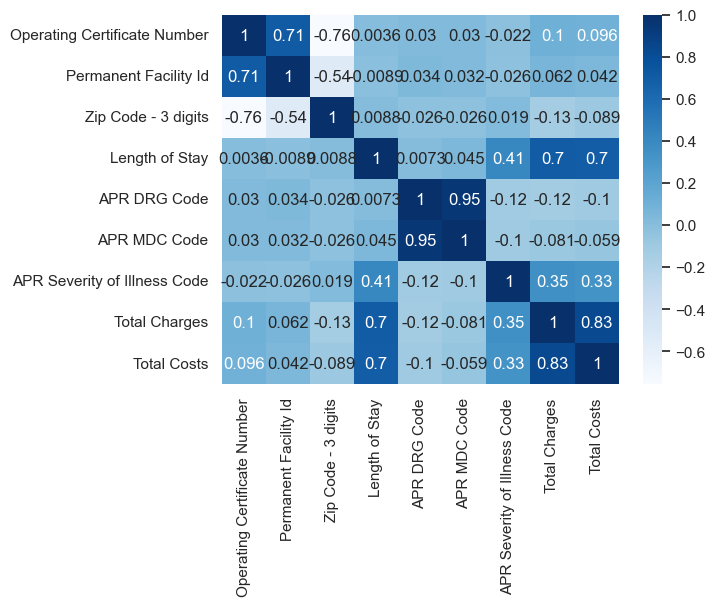

In [85]:
sns.heatmap(data=corr,annot=True,cmap='Blues')
plt.show()

**Length of Stay vs Financials:**

- Total Charges (0.70) and Total Costs (0.70) are strongly positively correlated with Length of Stay.

This indicates that the longer a patient stays in the hospital, the higher the associated costs and charges—an expected result in healthcare.

**Total Charges vs Total Costs:**

- These two have a very high correlation (0.83).

Suggests that as hospitals spend more (costs), they proportionally charge more, maintaining a consistent markup or pricing strategy.

**APR Severity of Illness Code:**

Shows moderate positive correlations with:

- Length of Stay (0.41) – sicker patients stay longer.

- Total Charges (0.35) and Total Costs (0.33) – severe illness leads to higher treatment complexity and cost.

**APR DRG Code & APR MDC Code:**

- Very high correlation (0.95) between APR DRG Code and APR MDC Code.

These classification systems are closely related; both categorize diagnoses and are often aligned in hospital data.

**Zip Code - 3 digits:**

- Shows negative correlations with Total Charges (-0.13) and Total Costs (-0.09).

There may be geographical or socioeconomic factors at play; certain ZIP regions might have access to less costly healthcare or fewer procedures.

**Operating Certificate Number & Permanent Facility ID:**

- Moderately correlated with each other (0.71), which makes sense since they both are identifiers linked to facilities.

Weakly correlated with financial and clinical variables, indicating minimal direct influence on costs or patient outcomes.

**Interpretation Summary:**

Financial metrics (Total Charges and Costs) are primarily driven by clinical factors like Length of Stay and Severity of Illness.

Location (ZIP) and facility identifiers have minor or inverse relationships with costs, suggesting external socio-demographic influence.

The close link between DRG and MDC codes affirms consistency in diagnosis-based grouping systems.

### Inferential Statistics

### `Chi-Square Test`

**Hypotheses for Chi-Square Test:**
    
`Null Hypothesis (Ho):`
    
There is no significant association between Type of Admission and Patient Disposition.
(In other words, they are independent of each other.)

`Alternative Hypothesis (H1):`
    
There is a significant association between Type of Admission and Patient Disposition.
(That means one variable influences the distribution of the other.)

In [86]:
from scipy.stats import chi2_contingency

In [89]:
# Cross-tab
chi_table = pd.crosstab(data['Type of Admission'], data['Patient Disposition'])
chi_table

Patient Disposition,Another Type Not Listed,Cancer Center or Children's Hospital,Court/Law Enforcement,Critical Access Hospital,Expired,Facility w/ Custodial/Supportive Care,Federal Health Care Facility,Home or Self Care,Home w/ Home Health Services,Hosp Basd Medicare Approved Swing Bed,Hospice - Home,Hospice - Medical Facility,Inpatient Rehabilitation Facility,Left Against Medical Advice,Medicaid Cert Nursing Facility,Medicare Cert Long Term Care Hospital,Psychiatric Hospital or Unit of Hosp,Short-term Hospital,Skilled Nursing Home
Type of Admission,,,,,,,,,,,,,,,,,,,
Elective,301,91,281,3,1744,156,17,223124,56494,304,238,88,4077,2609,28,106,215,2495,10563
Emergency,4213,1008,1883,49,45519,2708,271,489759,145892,1019,6961,5672,18540,27036,557,1691,3828,15578,104357
Newborn,107,161,23,12,263,27,1,125608,2929,0,12,1,10,11,0,3,0,1046,13
Not Available,0,3,0,0,48,0,0,441,96,1,5,2,22,12,0,0,6,12,89
Trauma,11,18,31,2,373,9,3,2313,800,14,17,38,415,173,0,11,54,49,1332
Urgent,375,95,162,33,3823,103,45,94017,13646,121,441,271,2056,1154,16,143,465,1908,6577


In [119]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(chi_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

print('-----------------------------------------------------------------------------------------------')

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Type of Admission and Patient Disposition.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Chi-Square Statistic: 137073.24681585882
p-value: 0.0
-----------------------------------------------------------------------------------------------
Reject the null hypothesis: There is a significant association between Type of Admission and Patient Disposition.


This result means that the type of admission a patient undergoes (e.g., emergency, elective, urgent, etc.) significantly influences how they are discharged (e.g., discharged to home, transferred, expired, etc.).

This could be valuable for:

- Hospital discharge planning

- Policy recommendations

- Understanding risk and resource allocation by admission type

### `Annova`

**Hypotheses for One-Way ANOVA:**)

`Null Hypothesis (Ho):`

The mean Length of Stay is equal across all levels of APR Severity of Illness Description (i.e., no difference between the groups).

`Alternative Hypothesis (H1):`

At least one group's mean Length of Stay is significantly different from the others.

In [97]:
from scipy.stats import f_oneway

In [99]:
diagnosis_groups = data.groupby('APR Severity of Illness Description')['Length of Stay'].apply(list)
diagnosis_groups

APR Severity of Illness Description
Extreme     [3.0, 14.0, 19.0, 5.0, 16.0, 11.0, 13.0, 16.0,...
Major       [27.0, 5.0, 6.0, 2.0, 3.0, 4.0, 9.0, 4.0, 16.0...
Minor       [2.0, 6.0, 2.0, 2.0, 2.0, 1.0, 2.0, 14.0, 2.0,...
Moderate    [3.0, 3.0, 21.0, 7.0, 4.0, 5.0, 3.0, 3.0, 2.0,...
Name: Length of Stay, dtype: object

In [120]:
# ANOVA Test
anova_result = f_oneway(*diagnosis_groups.values)
print("ANOVA F-Statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)
print(anova_result)

print('---------------------------------------------------------------------------------------------')

alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in Length of Stay between at least two severity levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


ANOVA F-Statistic: 113433.72641036911
p-value: 0.0
F_onewayResult(statistic=113433.72641036911, pvalue=0.0)
---------------------------------------------------------------------------------------------
Reject the null hypothesis: There is a significant difference in Length of Stay between at least two severity levels.


The severity of a patient’s illness significantly impacts how long they stay in the hospital. This could help:

- Healthcare providers anticipate resource needs

- Allocate beds or staff better

- Improve discharge planning for severe cases

In [92]:
data.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

### `T-test`

**Hypotheses for Independent T-Test:**


`Null Hypothesis (Ho):`
    
There is no significant difference in the mean Length of Stay between Medical and Surgical patients.

`Alternative Hypothesis (H1):`
    
There is a significant difference in the mean Length of Stay between the two groups.



In [124]:
from scipy.stats import ttest_ind

group1 = data[data['APR Medical Surgical Description'] == 'Medical']['Length of Stay']
group2 = data[data['APR Medical Surgical Description'] == 'Surgical']['Length of Stay']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-Test Statistic:", t_stat)
print(f"p-value: {p_val:4f}")

print('---------------------------------------------------------------------------------------------')

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There's a significant difference in Length of Stay between Medical and Surgical patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Length of Stay between the two groups.")


T-Test Statistic: 14.277456562016399
p-value: 0.000000
---------------------------------------------------------------------------------------------
Reject the null hypothesis: There's a significant difference in Length of Stay between Medical and Surgical patients.


The test confirms that surgical cases typically have shorter or longer stays (depending on the sign of the t-statistic).

This insight can help in operational planning, staff allocation, and care pathway optimization based on patient type.

### A/B Testing

**A/B Test — Hypothesis Setup:**

`Null Hypothesis (Ho):`
    
There is no significant difference in the mean Total Charges between Emergency and Elective admission types.


`Alternative Hypothesis (H1):`
    
There is a significant difference in the mean Total Charges between the two admission types.

In [107]:
data['Type of Admission'].value_counts()

Type of Admission
Emergency        876541
Elective         302934
Newborn          130227
Urgent           125451
Trauma             5663
Not Available       737
Name: count, dtype: int64

In [127]:
# A/B Test Groups
group_A = data[data['Type of Admission'] == 'Emergency']['Total Charges']
group_B = data[data['Type of Admission'] == 'Elective']['Total Charges']

# T-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(group_A, group_B, equal_var=False)

print("A/B Test T-Statistic:", t_stat)
print(f"p-value:, {p_val:4f}")

print('---------------------------------------------------------------------------------------------')

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total Charges between Emergency and Elective admissions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Total Charges between Emergency and Elective admissions.")


A/B Test T-Statistic: 36.35143736069636
p-value:, 0.000000
---------------------------------------------------------------------------------------------
Reject the null hypothesis: There is a significant difference in Total Charges between Emergency and Elective admissions.


The high t-statistic suggests a strong difference between the two groups.

This insight can be used to understand cost implications of different types of admissions — Emergency cases may involve higher charges due to urgency and intensive care.